<a href="https://colab.research.google.com/github/elqvixote/CODIGO_TRADING_R_PLATZI/blob/master/03_Red_Neuronal_Saber11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Paquetes

#install.packages("devtools")
devtools::install_github("nebulae-co/saber")

library("dplyr")
library("saber")
library("nnet")

# Carga de datos

data("SB11_20112")

✔  checking for file ‘/tmp/Rtmpw6tELg/remotes3d7984a734/nebulae-co-saber-04cded4/DESCRIPTION’
─  preparing ‘saber’: (336ms)
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘saber_0.0.0.9500.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
tamano_muestral <- 2000

c(
  "ECON_PERSONAS_HOGAR",
  "ECON_CUARTOS",
  "ECON_SN_LAVADORA",
  "ECON_SN_NEVERA",
  "ECON_SN_HORNO",
  "ECON_SN_DVD",
  "ECON_SN_MICROHONDAS",
  "ECON_SN_AUTOMOVIL",
  "MATEMATICAS_PUNT"
  ) -> variables

In [6]:
 indices_muestra <- seq_len(nrow(SB11_20112)) %in% sample(seq_len(nrow(SB11_20112)), tamano_muestral)

 muestra <- subset(SB11_20112, subset = indices_muestra, select = variables)
 muestra <- na.omit(muestra)

In [7]:
muestra

ECON_PERSONAS_HOGAR,ECON_CUARTOS,ECON_SN_LAVADORA,ECON_SN_NEVERA,ECON_SN_HORNO,ECON_SN_DVD,ECON_SN_MICROHONDAS,ECON_SN_AUTOMOVIL,MATEMATICAS_PUNT
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
6,5,1,1,1,1,1,1,27
5,2,0,0,0,0,0,0,27
3,2,0,1,0,0,0,0,32
3,2,1,1,0,1,0,1,35
6,3,0,1,1,1,0,0,48
6,3,1,1,0,1,0,0,46
4,4,1,1,0,1,0,0,52
6,4,1,1,0,1,0,0,51
12,2,0,0,0,0,0,0,27


In [9]:
red_neuronal <- nnet(MATEMATICAS_PUNT ~ ., data = muestra, size = 10, linout = TRUE)
# El punto indica a R que debe pronosticar la nota de matemáticas respecto a todas las variables (es para no listarlas todas)

# weights:  101
initial  value 4643993.319690 
iter  10 value 274882.364520
iter  20 value 266902.634118
iter  30 value 265592.455071
iter  40 value 264115.548988
iter  50 value 262425.822305
iter  60 value 261549.239130
iter  70 value 260827.767606
iter  80 value 260600.715058
iter  90 value 260525.930217
iter 100 value 260305.331761
final  value 260305.331761 
stopped after 100 iterations


In [10]:
red_neuronal

a 8-10-1 network with 101 weights
inputs: ECON_PERSONAS_HOGAR ECON_CUARTOS ECON_SN_LAVADORA ECON_SN_NEVERA ECON_SN_HORNO ECON_SN_DVD ECON_SN_MICROHONDAS ECON_SN_AUTOMOVIL 
output(s): MATEMATICAS_PUNT 
options were - linear output units 

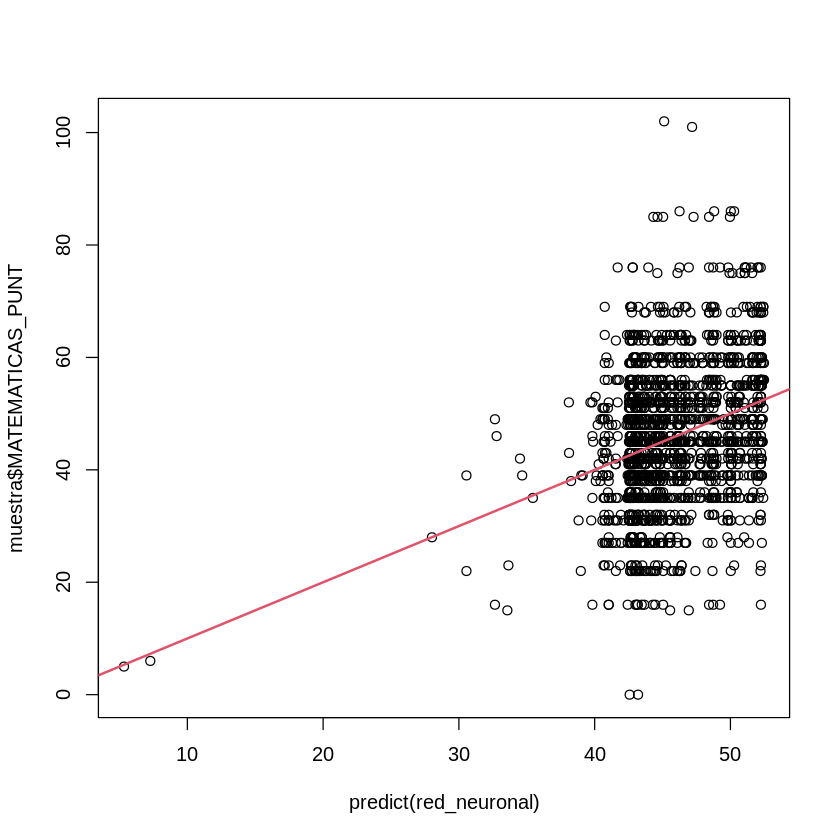

In [ ]:
plot(muestra$MATEMATICAS_PUNT ~ predict(red_neuronal))
abline(0, 1, lwd = 2, col = 2)

In [11]:
predict(red_neuronal)

1,49.34831
2,41.13750
3,44.04403
4,46.27963
5,43.98188
6,44.61882
7,47.72701
8,48.55437
9,41.07598
10,45.26315
11,43.01359
